# **Basic Concepts in Digital Image Processing** 
**Notebook creado por [Marlon Tecotl](https://www.linkedin.com/in/marlon-tecotl/) para el Master en [Vision Artificial](https://www.techtitute.com/informatica/master/master-vision-artificial) en [Tech](https://www.techtitute.com/) (2024).**



En primer lugar vamos a importar las librerias necesarias para el desarollo del notebook

In [3]:
# importamos las libreiras
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
import cv2
import numpy as np
import os

A continuación vamos a cargar la siguiente imagen


In [4]:
# ruta de la imagen a cargar
image_path = 'data/cat.jpg'

### **Cargar una imagen**

Mostrar la imagen en formarto BGR, mostrar por pantalla el alto, ancho y numero de canales

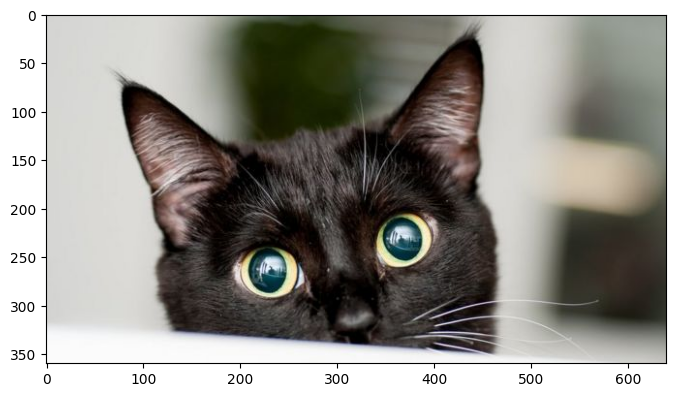

Alto = 360
Ancho = 640
Canales = 3


In [5]:
# cargamos la imagen
image = cv2.imread(image_path)
image  = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

#Mostramos el tamaño de la imagen
print("Alto = " + str(image.shape[0]))
print("Ancho = " + str(image.shape[1]))
print("Canales = " + str(image.shape[2]))

### **Pintar un borde blanco a la imagen**

Mostrar la imagen en formarto BGR, mostrar por pantalla el alto, ancho y numero de canales. 

Consultar: [cv2.copyMakeBorder()](https://www.geeksforgeeks.org/python-opencv-cv2-copymakeborder-method/)

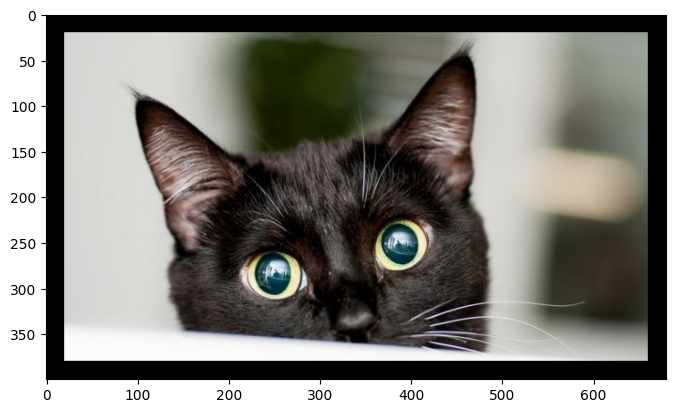

In [6]:
border_size = 20
constant= cv2.copyMakeBorder(image,
                             border_size,
                             border_size,
                             border_size,
                             border_size,
                             cv2.BORDER_CONSTANT,
                             value = [0,0,0])

plt.imshow(constant)
plt.show()

### **Subplot tres canales**

Se pide mostrar un plot 3x1 de los canales de la imagen por separado. Añadir un color bar.

Consultar: [plt image tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py)

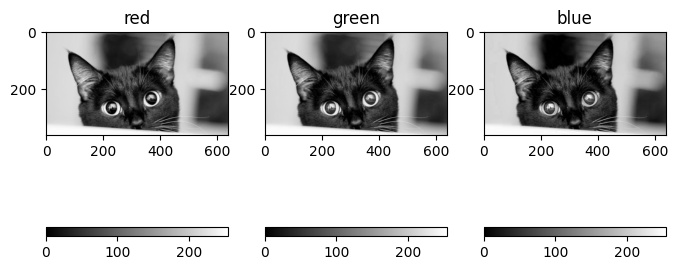

In [7]:
# lista con los nombres de los canales
channels = ['red', 'green', 'blue']

# recorremos el numero de canales
for i in range(image.shape[2]):
  plt.subplot(131 + i)
  plt.title(channels[i])
  plt.imshow(image[:,:,i], cmap='gray')
  plt.colorbar(orientation='horizontal')
plt.show()

### **Convertir la imagen en gris**

Se pide convertir y mostrar la imagen en gris

Consultar: [cv2 tutorial](https://techtutorialsx.com/2018/06/02/python-opencv-converting-an-image-to-gray-scale/)



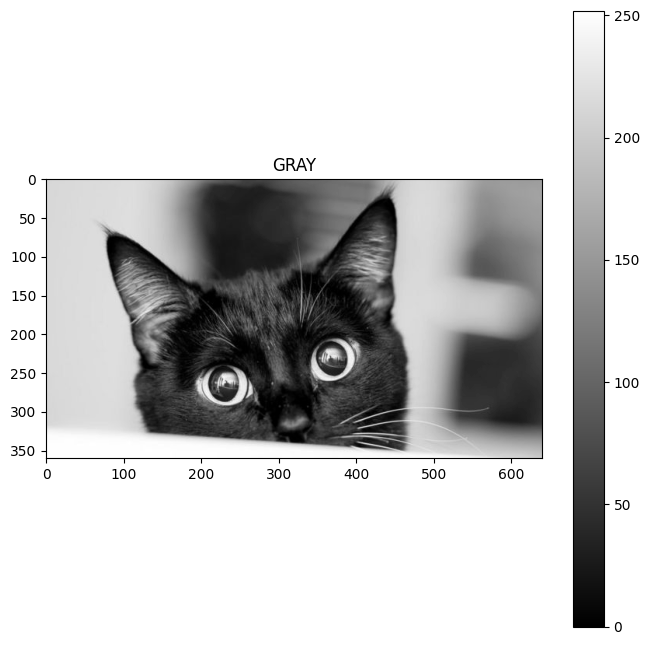

In [8]:
# convertimos la imagen a gris
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#hacemos el plot en marcando colo map en gris
plt.imshow(gray, cmap='gray')
plt.title("GRAY")
# activamos el color bar
plt.colorbar()
plt.show()

### **Guardar imagen**

Guardar la imagen en formato png

Consultar: [cv2 tutorial](https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/)


In [9]:
# guardamos la imagen
cv2.imwrite('gray.png', gray)

True

### **Recortes**

Recortar los ojos del gato y mostrar dos subplots. Uno con el ojo izquierdo y el otro con el ojo derecho.

Consultar: [cv2 tutorial](https://learnopencv.com/cropping-an-image-using-opencv/)

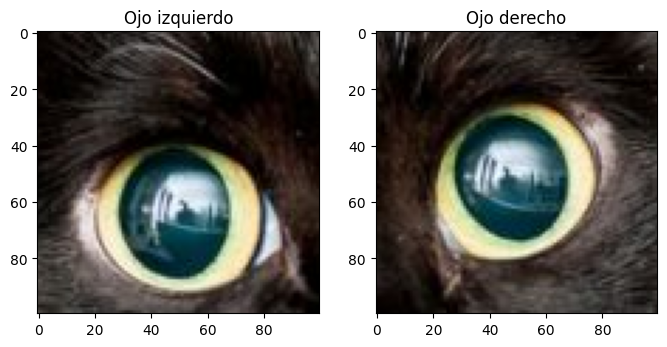

In [10]:
rois = [image[200:300, 180:280, :], image[180:280, 320:420, :]]
titles = ['Ojo izquierdo', 'Ojo derecho']
for i in range(2):
  plt.subplot(121 + i)
  plt.title(titles[i])
  plt.imshow(rois[i])
plt.show()

### **Pegar recortes en una nueva imagen**

Con los recortes anteriores vamos a montar un collage. En primer lugar vamos a cargar la siguiente imagen:

In [11]:
# ruta de la imagen a cargar
image_path = 'data/mouth.jpg'

Mostrar la imagen

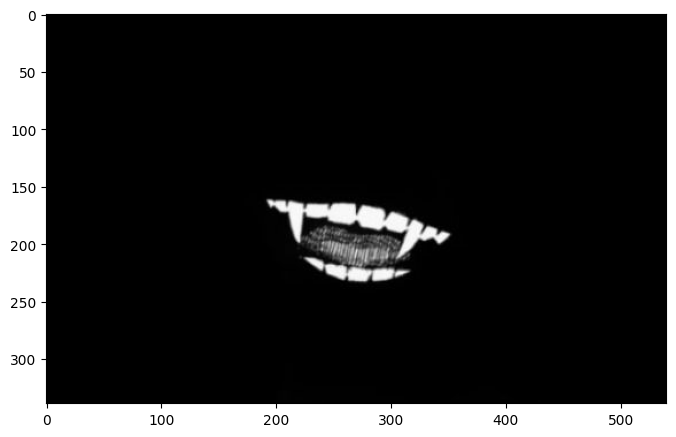

In [12]:
# cargamos la imagen
image = cv2.imread(image_path)
image  = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

A continuación, vamos a copiar la imagen. Usar el siguiente codigo

```
# copiamos la imagen
output_image = image.copy()
```

 Si no la copiamos modificaremos la imagen de entrada y por lo tanto a cada nueva ejecucion veremos que los recortes anteriores se mantienen en la imagen.

 Despues enganchar los recortes y pasar la imagen a escala de grises para obtener un resultado similar al siguiente:

 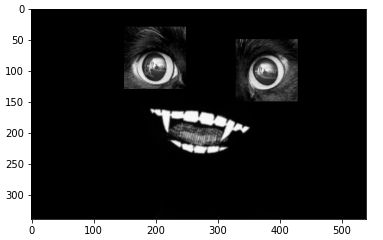

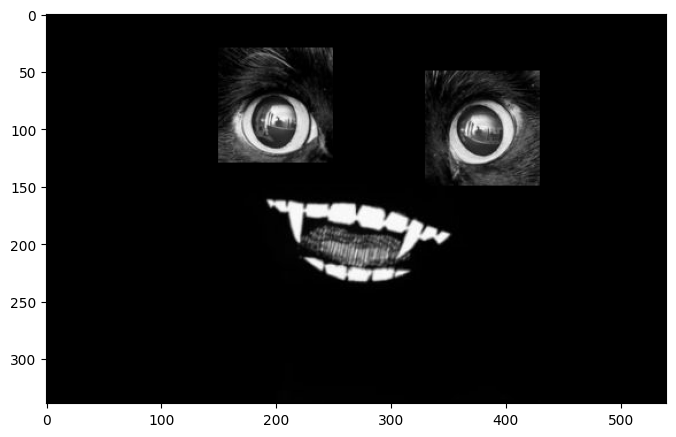

In [13]:
# copiamos la imagen
output_image = image.copy()

# offset en la posicion
offset_x = 30
offset_y = 150

# pegamos el recorte ojo izquierdo
output_image[offset_x: offset_x + rois[0].shape[0], offset_y: offset_y + rois[0].shape[1]] = rois[0]

# offset en la posicion
offset_x = 50
offset_y = 330

# pegamos el recorte ojo derecho
output_image[offset_x: offset_x + rois[1].shape[0], offset_y: offset_y + rois[1].shape[1]] = rois[1]

# convertimos a escala de grises
output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)

# mostramos los resultados
plt.imshow(output_image, cmap = 'gray')
plt.show()

### **Distancia entre dos pixeles**

Vamos a calcular la distancia diagonal de la imagen, igual que se hace para saber el tamaño en pulgadas de un televisor:

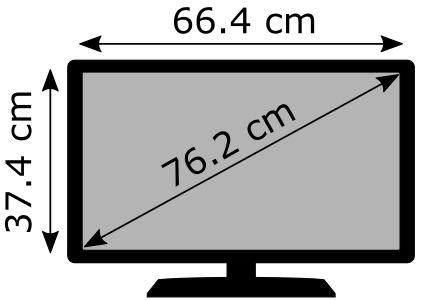


Para ello vamos a coger el pixel = (0,0) y el pixel correspondiente a  pixel = (ancho -1, alto -1)

D(p,q)= $\sqrt{(x-s)^2 + (y-t)^2}.$

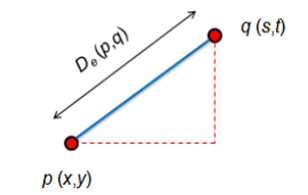



In [14]:
import math

# obtenemos el tamaño de la imagen
Alto = output_image.shape[0]
print(f"Alto : {Alto}")
Ancho = output_image.shape[1]
print(f"Ancho : {Ancho}")

# definimos los puntos
p = (Alto, 0)
q = (0, Ancho)

# calculamos la distancia
D = math.sqrt(math.pow(q[1] - p[1], 2) + math.pow(q[0] - p[0], 2))

# mostramos el resultado
print('Diagonal de la imagen = ' + str(D))

Alto : 339
Ancho : 540
Diagonal de la imagen = 637.5899936479556


### **Resize**

En muchos casos es necesario cambiar el tamaño de la imagen, ya sea porque la queremos guardar en disco y queremos reducir su espacio, o porque queremos hacer una operacion con otra imagen de diferente tamaño.
Se pide cambiar el tamaño de la imagen anterior a una imagen de 350x150,  otra del doble de tamañano y otra de 1/4 del tamaño original. Tener en cuenta que la funcion cv2.resize espera el tamaño en int.

Consultar: [learnopencv](https://learnopencv.com/image-resizing-with-opencv/)

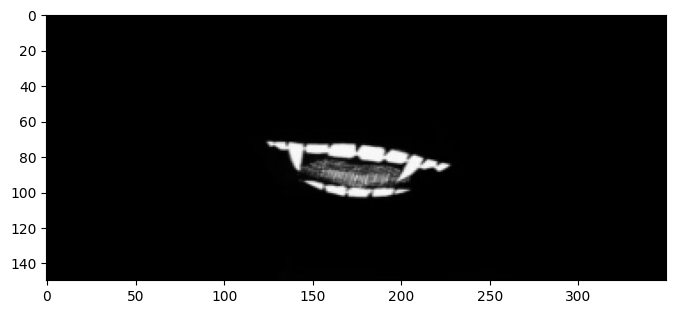

In [15]:
# copiamos la imagen
output_image = image.copy()

# cambiamos el tamaño
resized = cv2.resize(output_image, (350,150))

# mostramos los resultados
plt.imshow(resized, cmap = 'gray')
plt.show()

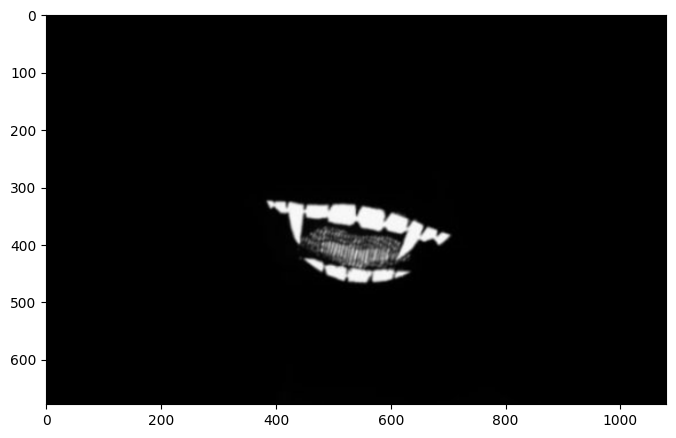

In [16]:
# cambiamos el tamaño
resized = cv2.resize(output_image, (output_image.shape[1]*2, output_image.shape[0]*2))

# mostramos los resultados
plt.imshow(resized, cmap = 'gray')
plt.show()

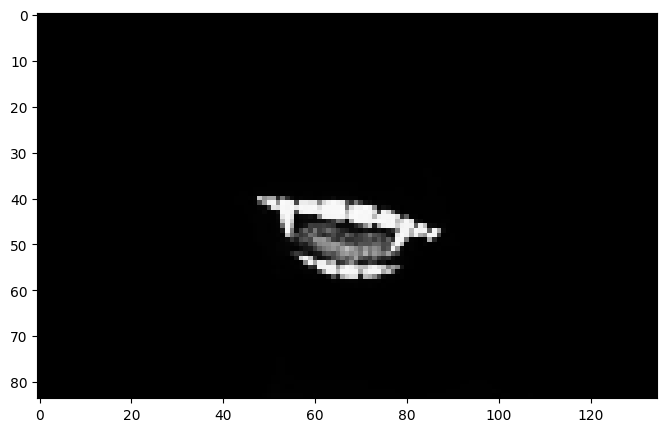

In [17]:
# cambiamos el tamaño
resized = cv2.resize(output_image, (int(output_image.shape[1]/4), int(output_image.shape[0]/4)))

# mostramos los resultados
plt.imshow(resized, cmap = 'gray')
plt.show()